In [107]:
from IPython.display import Audio
import scipy.io.wavfile as wav
from scipy import signal
import numpy as np
from matplotlib import pyplot as plt

In [119]:
# Load the wave file
sample_rate, data = wav.read(r'C:\Users\thdub\polybox\12. Semester\Fachdidaktik Praktikum\Unterricht\Filter\c-major.wav')
data = np.float32(data) / 32767
data = data[:, 0]

# Define the filter parameters
order = 9
cutoff_freq = 480  # Hz
ripple = 0.1

# Design the Butterworth filter
b, a = signal.butter(order, cutoff_freq, btype='lowpass', analog=False, fs=sample_rate)
b, a = signal.cheby1(order, ripple, cutoff_freq, btype='low', analog=False, fs=sample_rate)

# Apply the filter to the data
filtered_data = signal.lfilter(b, a, data)
filtered_data_int16 = np.int16(filtered_data / np.max(np.abs(filtered_data)) * 32767)

# Save the filtered data to a new wave file
wav.write(r'C:\Users\thdub\polybox\12. Semester\Fachdidaktik Praktikum\Unterricht\Filter\c-major_filtered.wav', sample_rate, filtered_data_int16)

In [120]:
Audio(data, rate=sample_rate)

In [121]:
Audio(filtered_data, rate=sample_rate)

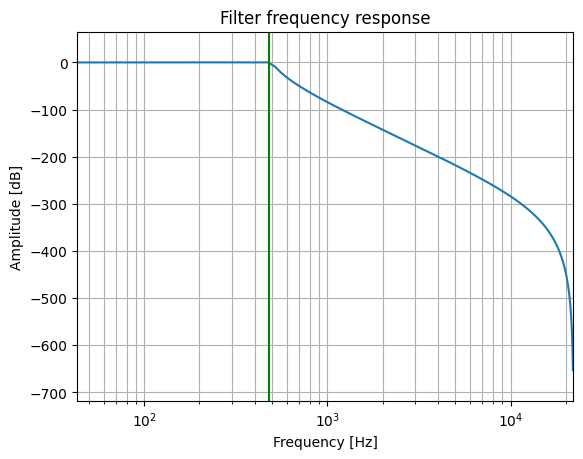

In [115]:
# Compute the frequency response of the filter
w, h = signal.freqz(b, a, fs=sample_rate)

# Plot the magnitude response
plt.figure()
plt.semilogx(w, 20 * np.log10(abs(h)))
plt.title('Filter frequency response')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(cutoff_freq, color='green')  # cutoff frequency

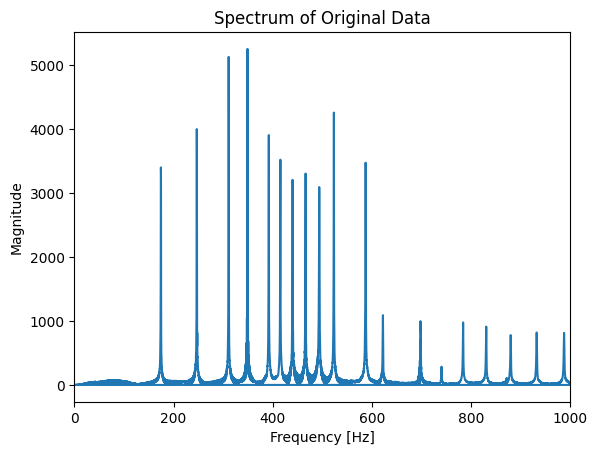

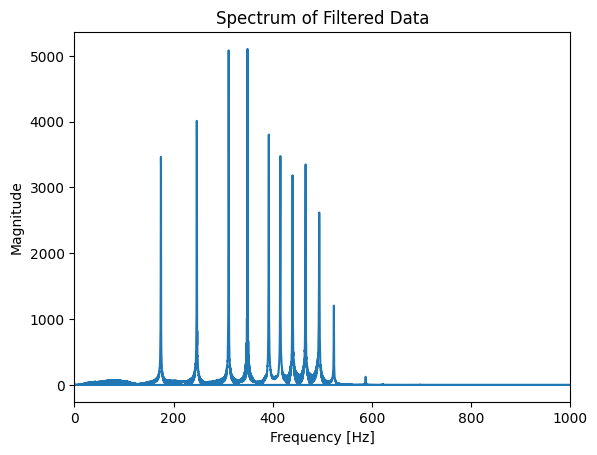

In [114]:
# Compute the Fourier transform of the data
data_fft = np.fft.fft(data)
filtered_data_fft = np.fft.fft(filtered_data)

# Compute the frequencies corresponding to the Fourier transform
freqs = np.fft.fftfreq(len(data), 1/sample_rate)

# Plot the spectrum of the data
plt.figure()
plt.plot(freqs, np.abs(data_fft))
plt.title('Spectrum of Original Data')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')
plt.xlim(0, 1000)

# Plot the spectrum of the filtered data
plt.figure()
plt.plot(freqs, np.abs(filtered_data_fft))
plt.title('Spectrum of Filtered Data')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')
plt.xlim(0, 1000)

plt.show()